In [1]:
# import libraries

import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
os.chdir('res')

In [3]:
# load data and EDA
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.drop(columns=['id'],inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


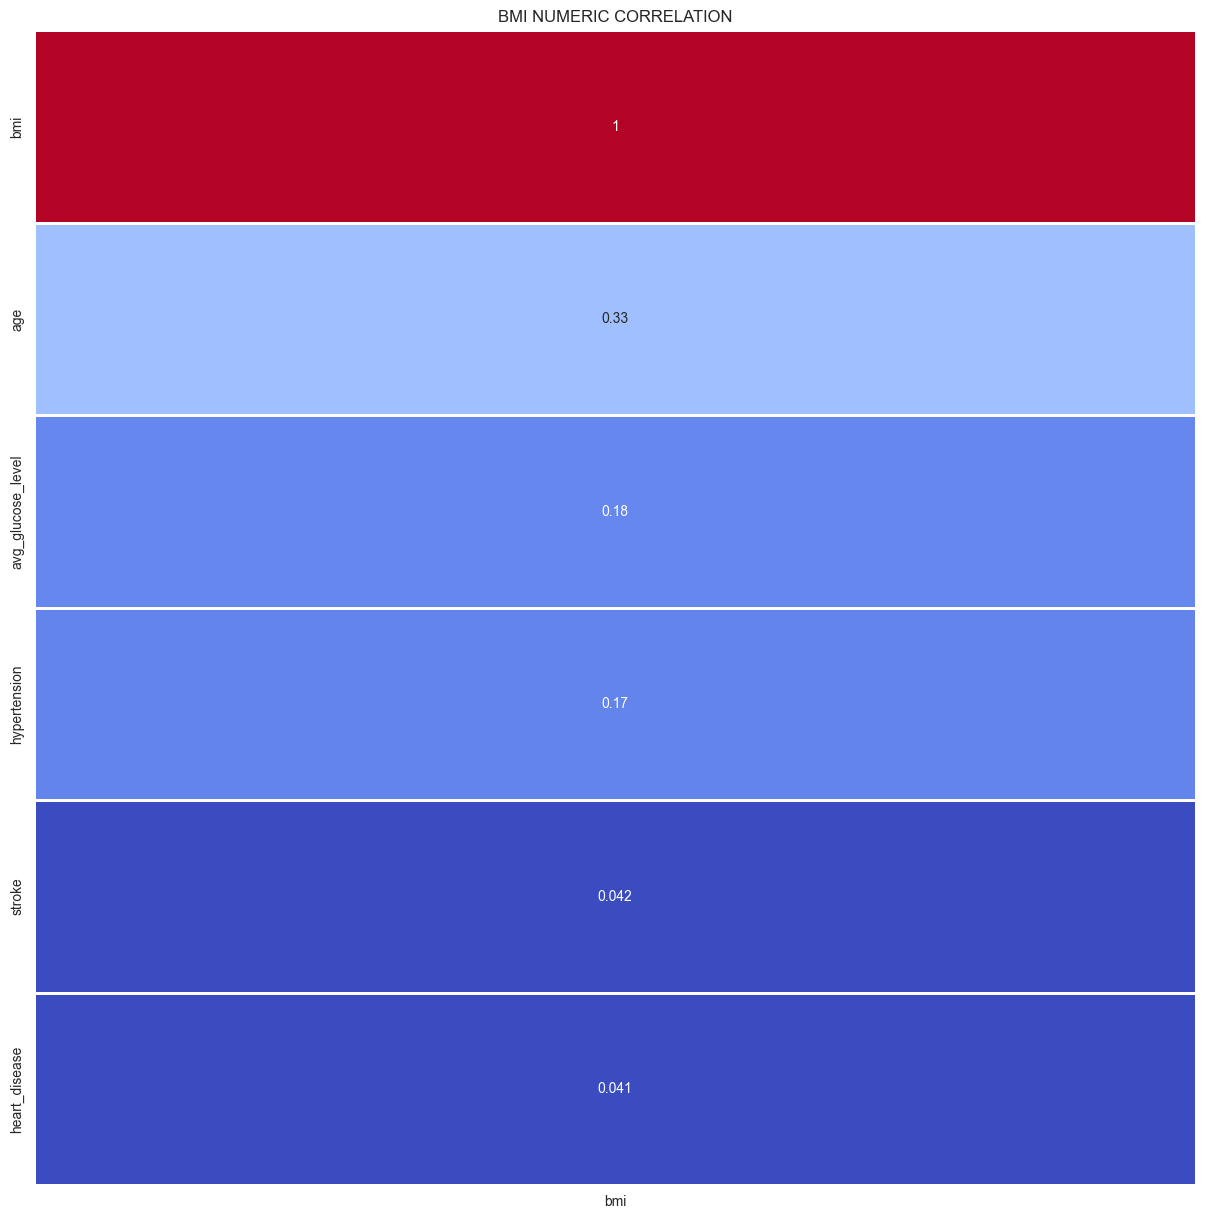

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include=['number']).corr()[['bmi']].sort_values(by='bmi',ascending=False),
            annot=True, linewidths=2, linecolor='white',cbar=False, cmap = 'coolwarm')
plt.title('BMI NUMERIC CORRELATION')
plt.show()

In [5]:
df.select_dtypes(include=['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [6]:
X = df[['work_type','Residence_type','smoking_status','age','hypertension','avg_glucose_level','gender','bmi']].copy()
X.head()

,work_type,Residence_type,smoking_status,age,hypertension,avg_glucose_level,gender,bmi
0,Private,Urban,formerly smoked,67.0,0,228.69,Male,36.6
1,Self-employed,Rural,never smoked,61.0,0,202.21,Female,NaN
2,Private,Rural,never smoked,80.0,0,105.92,Male,32.5
3,Private,Urban,smokes,49.0,0,171.23,Female,34.4
4,Self-employed,Rural,never smoked,79.0,1,174.12,Female,24.0


In [7]:
X['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [8]:
get_unique = lambda col : X[col].unique()
for col in X.columns:
    if X[col].dtype == 'object':
        print(f"{col} : {get_unique(col)}")

work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
gender : ['Male' 'Female' 'Other']


In [9]:
work_type_dict = {'Private' : 1,
                  'Self-employed' : 3,
                  'Govt_job' : 2,
                  'children' : -1,
                  'Never_worked' : 0}

residence_type_dict = {'Urban' : 0,
                       'Rural' : 1 }

smoking_status_dict = {'never smoked' : 0,
                       'smokes' : 1,
                       'formerly smoked' : 2,
                       'Unknown' : -1}

gender_dict = {'Male' : 1,
               'Female' : 0,
               'Other' : -1}

In [10]:
X.columns

Index(['work_type', 'Residence_type', 'smoking_status', 'age', 'hypertension',
       'avg_glucose_level', 'gender', 'bmi'],
      dtype='object')

In [11]:
def cnvrt_cat2num(col,col_dict):
    X[col].replace(col_dict,inplace=True)
    X[col] = pd.to_numeric(X[col],errors='coerce')
    

In [12]:
cnvrt_cat2num('work_type',work_type_dict)
cnvrt_cat2num('smoking_status',smoking_status_dict)
cnvrt_cat2num('Residence_type',residence_type_dict)
cnvrt_cat2num('gender',gender_dict)

In [13]:
X['gender']

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5110, dtype: int64

In [14]:
# find bmi correlation
corr_matrix = X.select_dtypes(include=['number']).corr()
bmi_corr = corr_matrix[['bmi']]
bmi_corr_sorted = bmi_corr.sort_values(by='bmi',ascending=False)

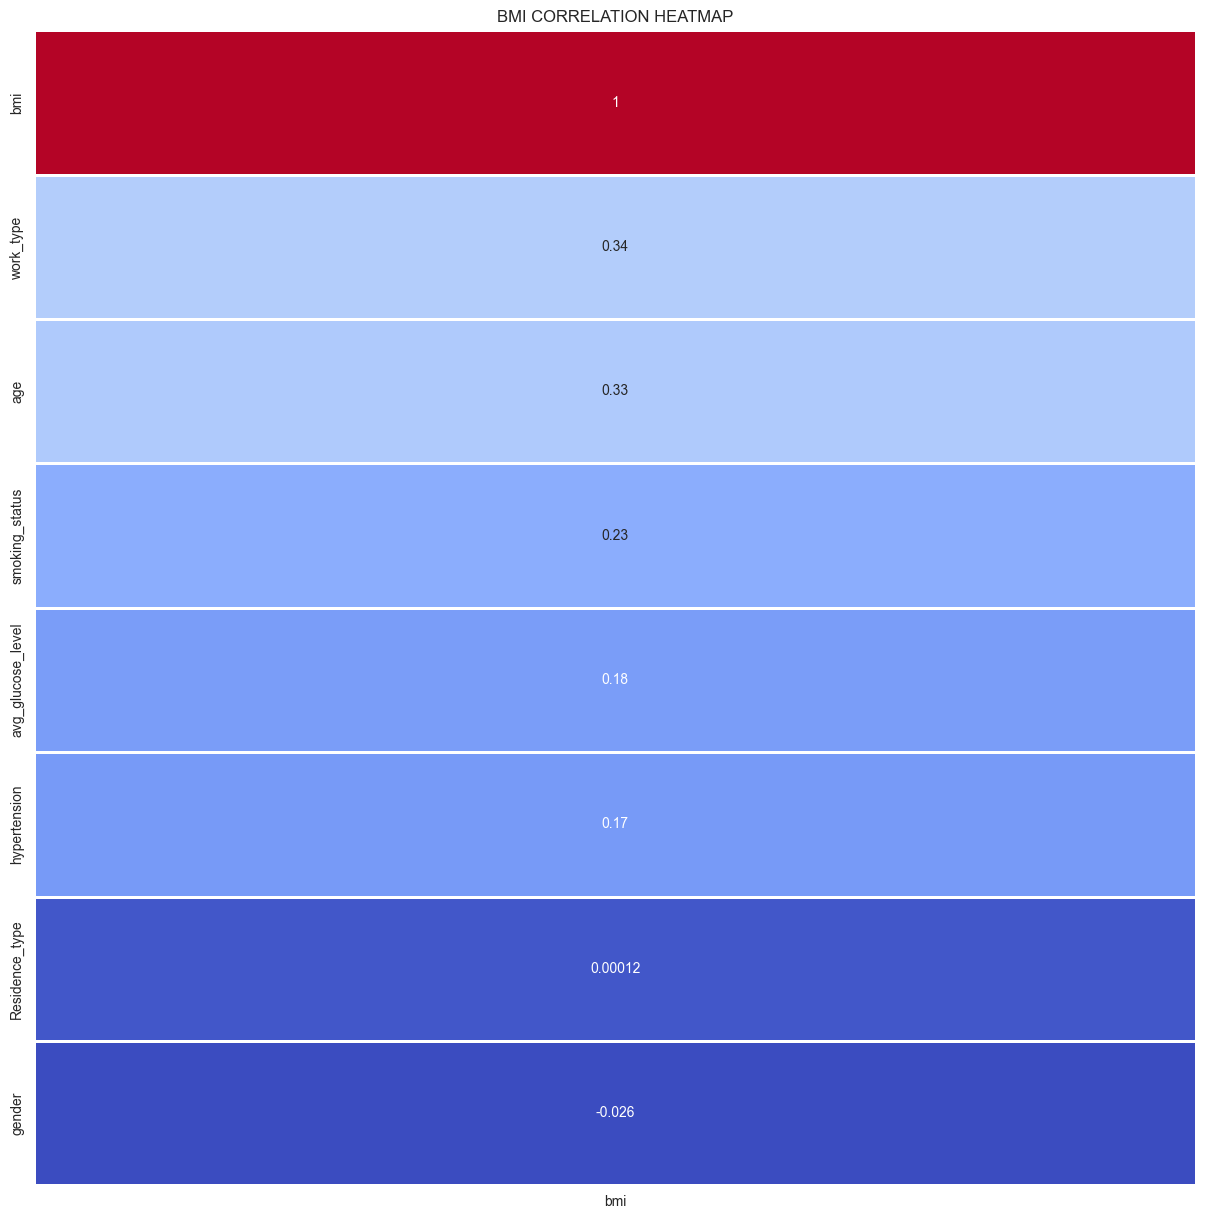

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(bmi_corr_sorted, annot=True, linewidths=2, linecolor='white',cbar=False, cmap = 'coolwarm')
plt.title('BMI CORRELATION HEATMAP')
plt.show() 

In [16]:
# work type, age, smoking_status, avg_glucose_level